In [1]:
import pandas as pd
from scipy.stats import t

t_value = -1.25
df = 24

cdf_value = t.cdf(t_value, df)
cdf_value

0.1116757390828102

## Single sample t test on Titanic dataset
we have 1300 age col.

H0 -> The pop mean age is 35

H1 -> The pop mean age is less than 35

In [12]:
import pandas as pd

# We know
mu = 35
train = pd.read_csv('train.csv').drop(columns=['Survived'])
test = pd.read_csv('test.csv')

titanic = pd.concat([train, test], ignore_index=True, sort=False).sample(1309)
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
459,460,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q
642,643,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
814,815,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,NaN,S
471,472,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
1155,1156,2,"Portaluppi, Mr. Emilio Ilario Giuseppe",male,30.0,0,0,C.A. 34644,12.7375,NaN,C
628,629,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
902,903,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S


In [13]:
pop = titanic['Age'].dropna()
pop.shape

(1046,)

In [14]:
sample_age = pop.sample(25).values
sample_age

array([48.  , 33.  , 25.  , 34.  , 32.  , 17.  ,  8.  , 34.  , 24.  ,
       24.  , 50.  , 17.  , 21.  ,  3.  , 22.  , 25.  , 19.  , 33.  ,
       22.5 , 17.  , 15.  , 45.  , 24.  ,  0.83, 17.  ])

In [15]:
x_bar = sample_age.mean()
s = sample_age.std()

#### Applying Shapiro-wilk test to prove the normality of sample taken

If the p value generated (shapiro_age) is < 0.05 => NOT Normal

If the p value generated (shapiro_age) is > 0.05 => Normal

In [16]:
from scipy.stats import shapiro

shapiro_age = shapiro(sample_age)
shapiro_age

ShapiroResult(statistic=0.9575223098516673, pvalue=0.3673401242738994)

#### Hence Normally Distributed
All the assumptions done.

Now calculate the 

#### Instead of above procedure of manually doing, we have an inbuilt technique to find the t_test_1_sample

In [17]:
pop_mean = 35

In [18]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_1samp(sample_age, pop_mean)

print('t_statistic: ', t_statistic)
print('p_value:     ', p_value / 2)

t_statistic:  -4.281891934870761
p_value:      0.0001289485635038353


In [19]:
alpha = 0.05

if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


In [20]:
pop.mean()

29.881137667304014

## Desktop and mobile example
## Independent 2 sample t test

In [22]:
# The Shapiro-Wilk test returns two values: the test statistic (W) and the p-value.
# If the p-value is greater than your chosen significance level (α = 0.05),
# you can assume the data comes from a normally distributed population.
# If the p-value is less than or equal to the significance level, the normality assumption is not met,
# and you should consider applying a data transformation or using a non-parametric test like the Mann-Whitney U test.

from scipy.stats import shapiro

# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21,
                 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16,
                15, 13, 16, 11]

# Perform the Shapiro Wilk test for both desktop and mobile users
shapiro_desktop = shapiro(desktop_users)
shapiro_mobile = shapiro(mobile_users)

# If the p value generated (shapiro_age) is < 0.05 => NOT Normal
# If the p value generated (shapiro_age) is > 0.05 => Normal
print('Shapiro-wilk test for desktop users: ', shapiro_desktop)
print('Shapiro-wilk test for mobile users: ', shapiro_mobile)
print("\n\nThey both follow NORMAL Distribution")

Shapiro-wilk test for desktop users:  ShapiroResult(statistic=0.9783115512411942, pvalue=0.7791003299808725)
Shapiro-wilk test for mobile users:  ShapiroResult(statistic=0.9714355768676655, pvalue=0.5791606602037616)


They both follow NORMAL Distribution


In [30]:
# If the p-value from Levene's test is greater than your chosen significance level (α = 0.05), you can assume equal variances
#  If the p-value is less than or equal to the significance level, the assumption of equal variances is not met,
# and you should consider using Welch's t-test instead of the regular independent two-sample t-test.

from scipy.stats import levene

# Perform Levene's test
levene_test = levene(desktop_users, mobile_users)
print(levene_test)

if levene_test[1] < 0.05:
    print('\n\nVariance of Group A is NOT EQUAL to Variance of Group B')
else:
    print('\n\nVariance of Group A is EQUAL to Variance of Group B')

LeveneResult(statistic=2.94395488191752, pvalue=0.09153720526741756)


Variance of Group A is EQUAL to Variance of Group B


In [34]:
from scipy.stats import t

t_value = -5.25
df = 30 + 30 - 2

cdf_value = t.cdf(t_value, df)
print(cdf_value * 2)

2.2563697469332243e-06


In [35]:
print('Reject the NULL Hypothesis')

Reject the NULL Hypothesis


## Titanic Dataset Independent 2 Sample t test

H1 = > Avg age of males is significantly greater than avg age of females

In [37]:
pop_male = titanic.query('Sex == "male"')['Age'].dropna()
pop_female = titanic.query("Sex == 'female'")['Age'].dropna()

print(pop_male.shape)
print(pop_female.shape)

(658,)
(388,)


In [38]:
sample_male = pop_male.sample(25)
sample_female = pop_female.sample(25)

alpha = 0.05

H0 => Avg Age of Male is similar to Avg Age of Female

H1 => Avg Age of Male > Avg Age of Female

alpha = 0.05

normality test

Equal variance test

In [43]:
# Normality
from scipy.stats import shapiro

# Perform the Shapiro-wilk test for both desktop and mobile users
shapiro_male = shapiro(sample_male)
shapiro_female = shapiro(sample_female)

print('Shapiro-wilk test for Male: ', shapiro_male)
print('\nShapiro-wilk test for Female: ', shapiro_female)

# If the p value generated (shapiro_age) is < 0.05 => NOT Normal
# If the p value generated (shapiro_age) is > 0.05 => Normal

if shapiro_male[1] < 0.05:
    print('\n\nshapiro_male is NOT NORMAL')
else:
    print('\n\nshapiro_male is Normal')

if shapiro_female[1] < 0.05:
    print('\n\nshapiro_female is NOT NORMAL')
else:
    print('\n\nshapiro_female is Normal')

Shapiro-wilk test for Male:  ShapiroResult(statistic=0.9366370880880145, pvalue=0.12375911180268556)

Shapiro-wilk test for Female:  ShapiroResult(statistic=0.9303784858287785, pvalue=0.08867559504135185)


shapiro_male is Normal


shapiro_female is Normal


In [42]:
# Equal Variance 
from scipy.stats import levene

# Perform Levene's test
levene_test = levene(sample_male, sample_female)
print(levene_test)

if levene_test[1] < 0.05:
    print('\n\nVariance of Group A is NOT EQUAL to Variance of Group B')
else:
    print('\n\nVariance of Group A is EQUAL to Variance of Group B')

LeveneResult(statistic=0.1143741350786739, pvalue=0.7366929570804656)


Variance of Group A is EQUAL to Variance of Group B


In [45]:
# Now we can apply the test

import scipy.stats as stats

t_statistic, p_value = stats.ttest_ind(sample_male, sample_female)

print('t_statistic:', t_statistic)
print('p_value:    ', p_value / 2)

t_statistic: 0.12549652497775077
p_value:     0.4503273176706972


#### If p_value is 0.40 then we can't reject the Null Hypothesis

Hence, mean age of male and female are similar to each other

In [46]:
## In reality 
pop_male.mean()

30.58522796352584

In [47]:
pop_female.mean()

28.68708762886598

## Paired 2 Sample t test

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

before = np.array([80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91])
after = np.array([78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88])

In [51]:
diff = after - before
diff

array([-2,  1,  6, -1,  3, -2,  1,  1, -1,  0,  1, -3, -2,  2, -3])

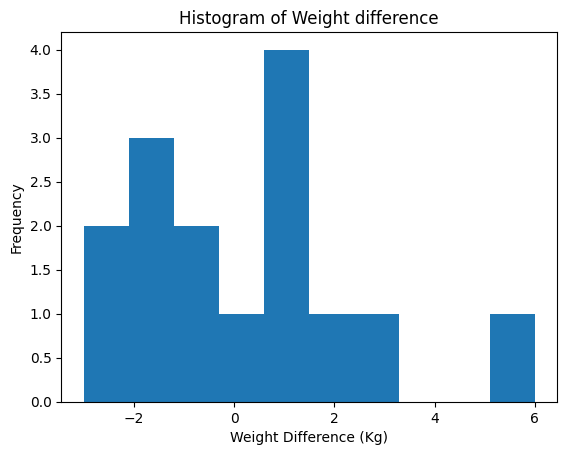

Shapiro-Wilk test:  ShapiroResult(statistic=0.9220571486009436, pvalue=0.20704778986900568)


In [50]:
plt.hist(diff)
plt.title('Histogram of Weight difference')
plt.xlabel('Weight Difference (Kg)')
plt.ylabel('Frequency')
plt.show()

shapiro_test = stats.shapiro(diff)
print('Shapiro-Wilk test: ', shapiro_test)

In [52]:
# The p value above 0.0207 is greater than 0.05 so it follows normal distrib 
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)

In [55]:
n = len(diff)
t_statistic = mean_diff / (std_diff / np.sqrt(n))
df = n - 1

In [57]:
t_statistic

0.10482848367219182

In [58]:
alpha = 0.05
p_value = stats.t.cdf(t_statistic, df)

In [59]:
p_value

0.5410005146857456

In [ ]:
# Since 0.54 > 0.05 
# Hence we cannot reject the H0
# Therefore there was no significant change in weights